---
<h1>Name: Fernaldy Aristo Wirjowerdojo</h1>

This programme was created to perform an analysis on the current (August to October 2023) market price of apartments in the 15 largest cities in Poland and what factors may affect the changes in the prices.

---

# Data Background & Problem Statement

## Background Information

The data is obtained from Kaggle with <a href="https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data">this link</a> where it's collected from local websites on apartments for sale by Krzysztof Jamroz. This dataset is about apartment prices in the 15 largest cities in Poland and is further enhanced by collecting data from *Open Street Map* to note the nearest points of interests from each apartment.

The columns from the data are:
1. `id`: Unique identifier of each listing
2. `city`: Location of the city the property is located in
3. `type`: Building type of the apartment
4. `squareMeters`: Size of the apartment in square meters
5. `rooms`: Number of rooms
6. `floor`: The floor which the apartment is located on
7. `floorCount`: The amount of floors the apartment building has
8. `buildYear`: The year when the building was built
9. `latitude`: Latitude of the apartment building
10. `longitude`: Longitude of the apartment building
11. `centreDistance`: Distance to city centre in km
12. `poiCount`: The amount of points of interest in a 500m radius
13. `schoolDistance`: Distance to nearest school
14. `clinicDistance`: Distance to nearest clinic
15. `postOfficeDistance`: Distance to nearest post office
16. `kindergartenDistance`: Distance to nearest kindergarten
17. `restaurantDistance`: Distance to nearest restaurant
18. `collegeDistance`: Distance to nearest college
19. `pharmacyDistance`: Distance to nearest pharmacy
20. `ownership`: The type of property ownership
21. `buildingMaterial`: Type of material used for the apartment building
22. `condition`: The apartment condition
23. `hasParkingSpace`: Availability of parking space
24. `hasBalcony`: Availability of balcony
25. `hasElevator`: Availability of elevator
26. `hasSecurity`: Availability of security features
27. `hasStorageRoom`: Availability of storage room
28. `price`: Offer price of apartment in Polish Złoty

## SMART Framework

1. Specific: Analyse the current pricing condition of apartments in Poland and how it's affected by certain features such as location, number of rooms, points of interest and key features unique to each apartment.

2. Measurable:
    - Measure the distribution of apartment prices across different cities
    - Determine the most common type of apartments in each city
    - Find the relationship between apartment price and number of rooms
    - Test the correlation between having key features and apartment price
    - Calculate the significance of the different prices of apartments with only one of the following features: Parking space, balcony, elevator, security or storage room
      
3. Achievable: Utilise python and available libraries such as pandas, scipy, matplotlib and seaborn, to visualise and perform statistical testing efficiently
    
4. Relevant: Understanding the factors that affect the current market price of apartments in Poland can help in making better decisions

5. Time-bound: Analysis will be done within one week

## 5W + 1H

1. How does the distribution of apartment prices vary across the different cities in Poland?
2. What apartment types are common in cities in Poland?
3. How does the average price of apartments vary with the number of rooms in the apartment?
4. How do apartment prices differ based on the number of nearby points of interest?
5. How do specific features affect the pricing of the apartments?
6. Is there a significant difference in the prices of apartments with only one of the following features: Parking space, balcony, elevator, security or storage room?

## Problem Statement

By analysing the current apartment pricing in the 15 largest cities in Poland in regards to its type and how certain features can affect the apartment price, valuable insight on the apartment market condition can be obtained to lead to a better and more informed decision making.

---

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
# Supressing warnings caused by seaborn

# Data Loading

In [3]:
df_august = pd.read_csv("apt_pl_202308.csv") # August Data
df_september = pd.read_csv("apt_pl_202309.csv") # September Data
df_october = pd.read_csv("apt_pl_202310.csv") # October Data

df = pd.concat([df_august, df_september, df_october], ignore_index=True) # Combinethe three dataframes into one

In [4]:
pd.set_option('display.max_columns', None)

---

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52592 entries, 0 to 52591
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52592 non-null  object 
 1   city                  52592 non-null  object 
 2   type                  40942 non-null  object 
 3   squareMeters          52592 non-null  float64
 4   rooms                 52592 non-null  float64
 5   floor                 43065 non-null  float64
 6   floorCount            51842 non-null  float64
 7   buildYear             43467 non-null  float64
 8   latitude              52592 non-null  float64
 9   longitude             52592 non-null  float64
 10  centreDistance        52592 non-null  float64
 11  poiCount              52592 non-null  float64
 12  schoolDistance        52542 non-null  float64
 13  clinicDistance        52340 non-null  float64
 14  postOfficeDistance    52519 non-null  float64
 15  kindergartenDistanc

In [6]:
df.sample(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
7884,83b631a944770318203a0a5e6d6b5ac8,wroclaw,tenement,25.0,1.0,4.0,4.0,1900.0,51.107100,17.061100,2.22,20.0,0.092,0.450,0.118,0.262,0.366,0.478,0.299,condominium,brick,NaN,yes,no,no,no,no,319000
7479,32bac3735c10d78290819cc1f5523380,wroclaw,NaN,56.0,2.0,6.0,6.0,1999.0,51.122047,17.054460,2.13,17.0,0.179,0.070,0.617,0.183,0.461,1.119,0.066,condominium,brick,premium,no,no,yes,no,yes,639000
13499,7e37802a53a132ce387af1cffb87e682,warszawa,apartmentBuilding,47.0,3.0,3.0,8.0,2022.0,52.264100,21.042800,4.48,13.0,0.149,0.745,0.401,0.267,0.303,0.885,0.241,condominium,brick,NaN,yes,yes,yes,no,no,1134000
11693,a5c5b40ee065b902ba74977ae15b7ffe,lublin,blockOfFlats,50.0,3.0,6.0,7.0,1977.0,51.260965,22.547284,2.05,28.0,0.258,0.204,0.162,0.140,0.192,0.510,0.185,condominium,concreteSlab,low,no,yes,yes,no,yes,369000
41498,bd932d65c2a675ca835c0f8f90a7fe15,gdansk,apartmentBuilding,55.0,3.0,1.0,2.0,2023.0,54.343910,18.826330,11.16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,condominium,brick,NaN,no,yes,no,yes,no,597000


In [7]:
# Checking for duplicates based on ID
df["id"].duplicated().sum()

20565

In [8]:
# Dropping all the duplicates based on ID
df = df.drop_duplicates(subset="id")

In [9]:
df["id"].duplicated().sum()

0

In [10]:
df.shape

(32027, 28)

In [11]:
# Checking unique values for the columns: type, hasParkingSpace, hasBalcony, 
# hasElevator, hasSecurity and hasStorageRoom
print("Unique values for type:", df["type"].unique())

for col in df.columns[22:27]:
    print(f"Unique values for {col}: {df[col].unique()}")

Unique values for type: ['blockOfFlats' 'tenement' 'apartmentBuilding' nan]
Unique values for hasParkingSpace: ['yes' 'no']
Unique values for hasBalcony: ['yes' 'no']
Unique values for hasElevator: ['yes' 'no' nan]
Unique values for hasSecurity: ['no' 'yes']
Unique values for hasStorageRoom: ['yes' 'no']


In [12]:
# Filling the missing values for hasElevator with 'no' for no elevator
df["hasElevator"] = df["hasElevator"].fillna('no')
df["hasElevator"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
# Converting the 5 columns into boolean datatype
for col in df.columns[22:27]:
    df[col] = df[col].map({'yes': True, 'no': False})

In [14]:
# Fixing the input for column type for better reading
df["type"] = df["type"].str.replace("blockOfFlats", "Block of flats")\
                       .str.replace("apartmentBuilding", "Apartment building")\
                       .str.replace("tenement", "Tenement")

In [15]:
# Changing the [poi]Distance to metres from kilometres
for col in df.columns[12:19]:
    df[col] = df[col] * 1000

In [16]:
df.sample(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
10813,6bd34c13f02ccbd65b4ba6c06255f299,lodz,Apartment building,50.49,2.0,5.0,5.0,2016.0,51.752701,19.480093,3.65,14.0,283.0,225.0,232.0,446.0,146.0,1558.0,285.0,condominium,brick,NaN,True,True,True,True,False,499851
8076,cb362e7e002fdd672746cb2b198fcf9f,wroclaw,Block of flats,71.00,3.0,3.0,3.0,NaN,51.111676,17.060510,2.15,34.0,183.0,312.0,84.0,409.0,80.0,501.0,150.0,condominium,NaN,NaN,False,False,True,False,True,638900
6330,9af1fc18d752a2aa79a2f993aa0ccffc,gdansk,Tenement,33.00,2.0,2.0,4.0,1965.0,54.354509,18.648001,0.71,61.0,338.0,91.0,297.0,401.0,37.0,205.0,127.0,condominium,brick,NaN,False,True,False,False,True,669000
1929,484483487069949087c2aca940aba351,krakow,Tenement,34.00,1.0,1.0,4.0,1920.0,50.057322,19.954287,1.15,24.0,205.0,206.0,144.0,228.0,179.0,248.0,91.0,condominium,brick,NaN,True,False,False,False,True,780000
21018,730a3bbad0ee1401069bb0fd43ff7956,krakow,NaN,57.13,2.0,1.0,3.0,2014.0,50.020500,19.915500,4.20,2.0,613.0,797.0,610.0,373.0,630.0,2620.0,624.0,condominium,brick,NaN,True,True,False,False,False,649000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32027 entries, 0 to 52576
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    32027 non-null  object 
 1   city                  32027 non-null  object 
 2   type                  24844 non-null  object 
 3   squareMeters          32027 non-null  float64
 4   rooms                 32027 non-null  float64
 5   floor                 26314 non-null  float64
 6   floorCount            31595 non-null  float64
 7   buildYear             26447 non-null  float64
 8   latitude              32027 non-null  float64
 9   longitude             32027 non-null  float64
 10  centreDistance        32027 non-null  float64
 11  poiCount              32027 non-null  float64
 12  schoolDistance        31998 non-null  float64
 13  clinicDistance        31870 non-null  float64
 14  postOfficeDistance    31983 non-null  float64
 15  kindergartenDistance  31

---

# Analysis

An analysis based off of the dataset obtained can be done by answering the following questions:
1. How does the distribution of apartment prices vary across the different cities in Poland?
2. What apartment types are common in cities in Poland?
3. How does the average price of apartments vary with the number of rooms in the apartment
4. How do apartment prices differ based on the number of nearby points of interest?
5. How does the number of features affect the pricing of the apartments?
6. Is there a significant difference in the prices of apartments with only one of the following features: Parking space, balcony, elevator, security or storage room?

To answer these 6 questions, these approaches are used in order of each question.
1. A boxplot of the apartment prices grouped by city to see the distribution of apartment prices in each city

2. A column chart of apartment types grouped by city to see which type of apartments are most common in each city

3. A point plot of the number of rooms against the average apartment price to see how the number of rooms affect the prices

4. A scatter plot on the prices against the number of nearby points of interest to see how greatly the number of points of interest near the apartment affect the price 

5. A new column will be made to count the number of features each apartment listing has and correlation testing will be done on the new column against price to see the relationship between the two variables. The distribution of the data will be checked first to determine which correlation method to use.

6. ANOVA test will be done to see if there's a statistically significant difference on apartments with one of the following features: Parking space, balcony, elevator, security or storage room

## Measurement of central tendency of apartment prices in Poland

In [19]:
avg_price = df["price"].mean()
median_price = df["price"].median()

sdev_price = df["price"].std()
var_price = df["price"].var()

skew_price = df["price"].skew()
kurtosis_price = df["price"].kurtosis()

print(f"Average of apartment prices in Poland: {avg_price:.2f}")
print(f"Median of apartment prices in Poland: {median_price}")
print(f"Standard deviation of apartment prices in Poland: {sdev_price:.2f}")
print(f"Variance of apartment prices in Poland: {var_price:.2f}")
print(f"Skewness of apartment prices in Poland: {skew_price:.2f}")
print(f"Kurtosis of apartment prices in Poland: {kurtosis_price:.2f}")

Average of apartment prices in Poland: 698350.55
Median of apartment prices in Poland: 630000.0
Standard deviation of apartment prices in Poland: 340173.03
Variance of apartment prices in Poland: 115717692486.21
Skewness of apartment prices in Poland: 1.54
Kurtosis of apartment prices in Poland: 3.48


The distribution of apartment prices in Poland from August 2023 until September 2023 is skewed to the right with high level of kurtosis which indicates presence of outliers in the data.

## 1. Boxplot distribution of apartment prices across the different cities in Poland

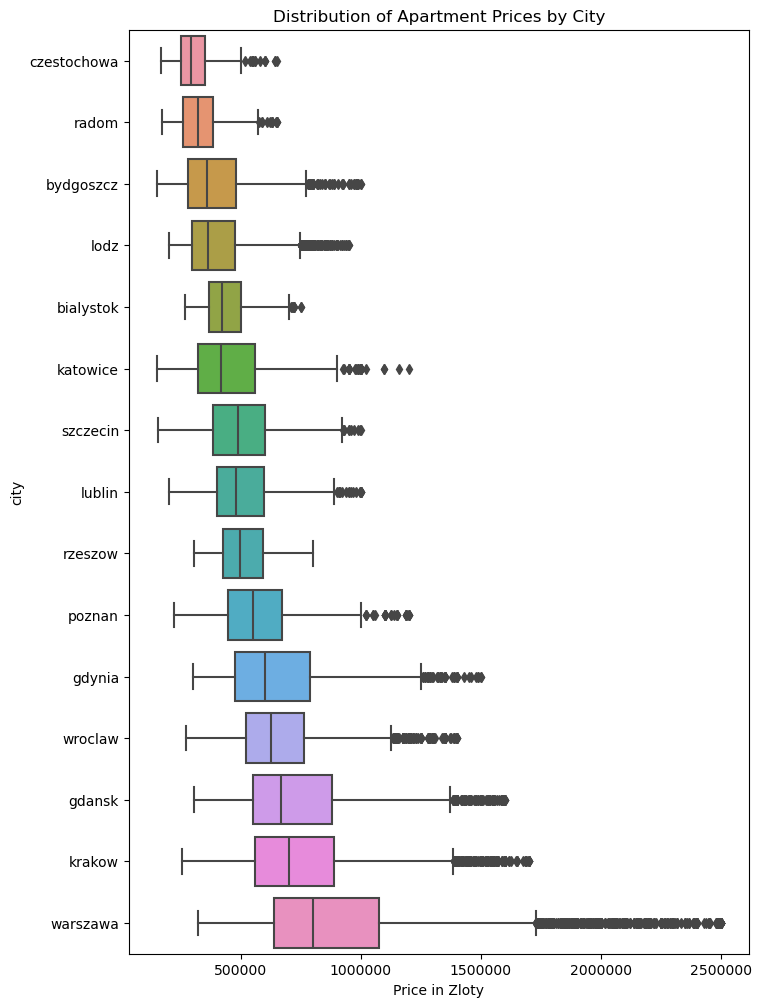

In [20]:
plt.figure(figsize=(8, 12))
# Boxplot of price grouped by city ordered by the mean of prices of the cities
sns.boxplot(x='price', y='city', data=df, order=df.groupby('city')['price'].mean().sort_values().index)

ax = plt.gca()
ax.set_xlabel("Price in Zloty") # Changing the x-axis label
plt.ticklabel_format(style='plain', axis='x')

plt.title('Distribution of Apartment Prices by City')
plt.show()

The boxplots of apartment prices for each city shows almost all cities have outliers to the right, which can be considered a natural occurrence in property pricing. Most of them also have their median closer to the first quartile and a longer right whisker which indicates right skewness.

The median of apartment price in Warszawa is around double the amount of the median in Czestochowa.

## 2. What apartment types are common in cities in Poland?

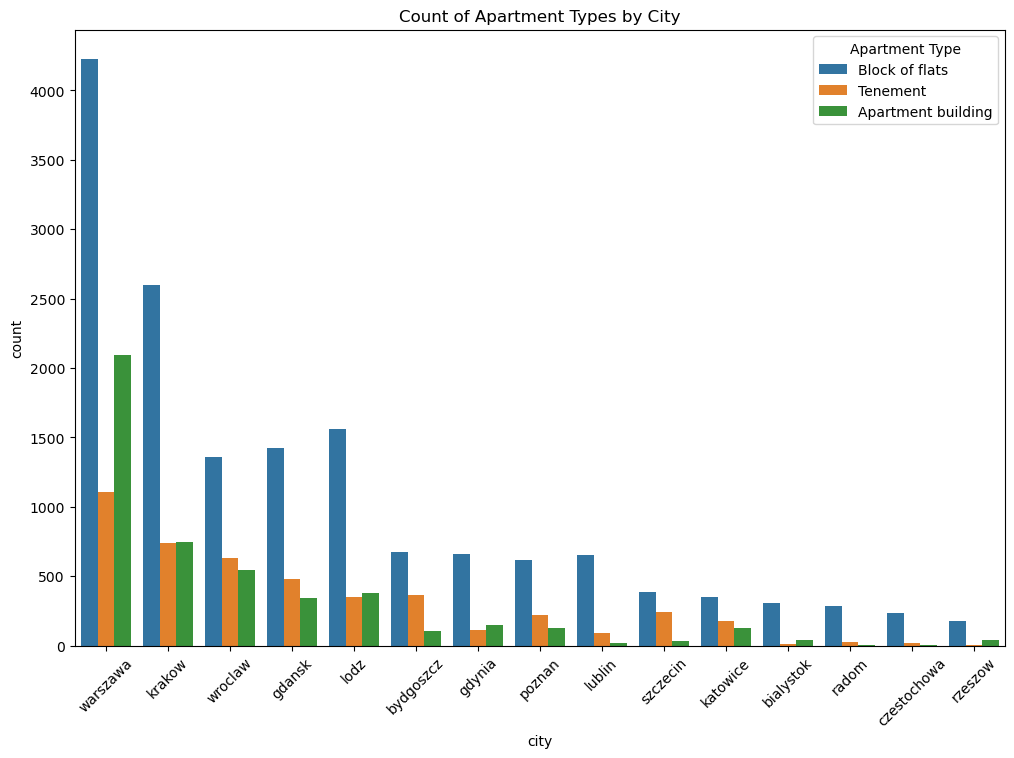

In [21]:
plt.figure(figsize=(12, 8))
# Count plot of apartment types grouped by each city and ordered by the total amount of each city
sns.countplot(data=df, x='city', hue='type', order=df['city'].value_counts().index)

plt.xticks(rotation=45)

plt.title('Count of Apartment Types by City')
plt.legend(title='Apartment Type', loc='upper right') 
plt.show()

The high discrepancy in the amounts of apartment listings is normal since there are cities that are more popular to live in. Block of flats is the most common apartment type in all the 15 cities in Poland.

## 3. How does the average price of apartments vary with the number of rooms in the apartment

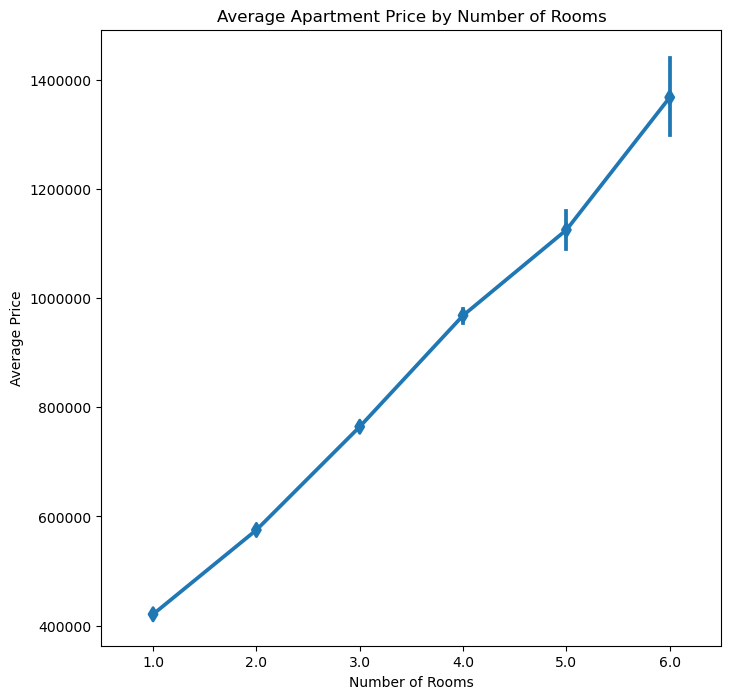

In [22]:
plt.figure(figsize=(8, 8))
# Point plot of room number against price
sns.pointplot(x='rooms', y='price', data=df, markers='d', linestyles='-')

ax = plt.gca()
ax.set_xlabel("Number of Rooms") # Changing x-axis label
ax.set_ylabel("Average Price") # Changing y-axis label
plt.ticklabel_format(style="plain", axis='y')

plt.title("Average Apartment Price by Number of Rooms")
plt.show()

The rise in price for every additional number of room is natural. However, one important thing to note is the rate of price change for each room. For every additional room until 4 rooms, the increase is around 200 thousand zloty, from four to five rooms the increase is only 100 thousand zloty and from five to six rooms the average price increased by 200 thousand zloty.

## 4. How do apartment prices differ based on the number of nearby points of interest?

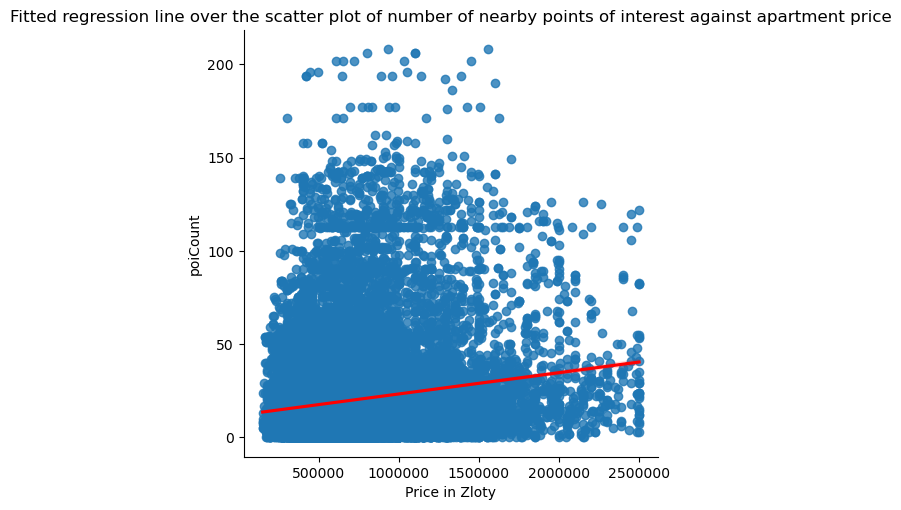

In [23]:
# Scatter plot and fitted regression line of price against the number of nearby points of interest
sns.lmplot(x="price", y="poiCount", data=df, line_kws={"color": "red"})

ax = plt.gca()
ax.set_xlabel("Price in Zloty") # Changing x-axis label
plt.ticklabel_format(style="plain", axis='x')

plt.title("Fitted regression line over the scatter plot of number of nearby points of interest against apartment price")
plt.show()

In [24]:
poi_more_than_100 = len(df[df["poiCount"] > 100])
poi_between_50_100 = len(df[(df["poiCount"] >= 50) & (df["poiCount"] <= 100)])
poi_less_than_50 = len(df[df["poiCount"] < 50])

print(f"There are {poi_more_than_100} listings with more than 100 nearby points of interest.")
print(f"There are {poi_between_50_100} listings with 50 to 100 nearby points of interest.")
print(f"There are {poi_less_than_50} listings with less than 50 nearby points of interest.")

There are 655 listings with more than 100 nearby points of interest.
There are 2005 listings with 50 to 100 nearby points of interest.
There are 29367 listings with less than 50 nearby points of interest.


The fitted regression line is located between where the number of nearby points of interest is 0 and 50 because that's where the majority of the data is. The regression line indicates a weak positive relationship between the number of nearby points of interest and apartment price. However, it's worth nothing that while there is an indication of correlation between the two variables it might not necessarily be causation.

## 5. How does the number of features affect the pricing of the apartments?

In [25]:
# Making a new column to store the amount of features each listings have (based on the [has]Features columns)
df["featureCount"] = df["hasParkingSpace"].astype(int)\
                    + df["hasBalcony"].astype(int)\
                    + df["hasElevator"].astype(int)\
                    + df["hasSecurity"].astype(int)\
                    + df["hasStorageRoom"].astype(int)

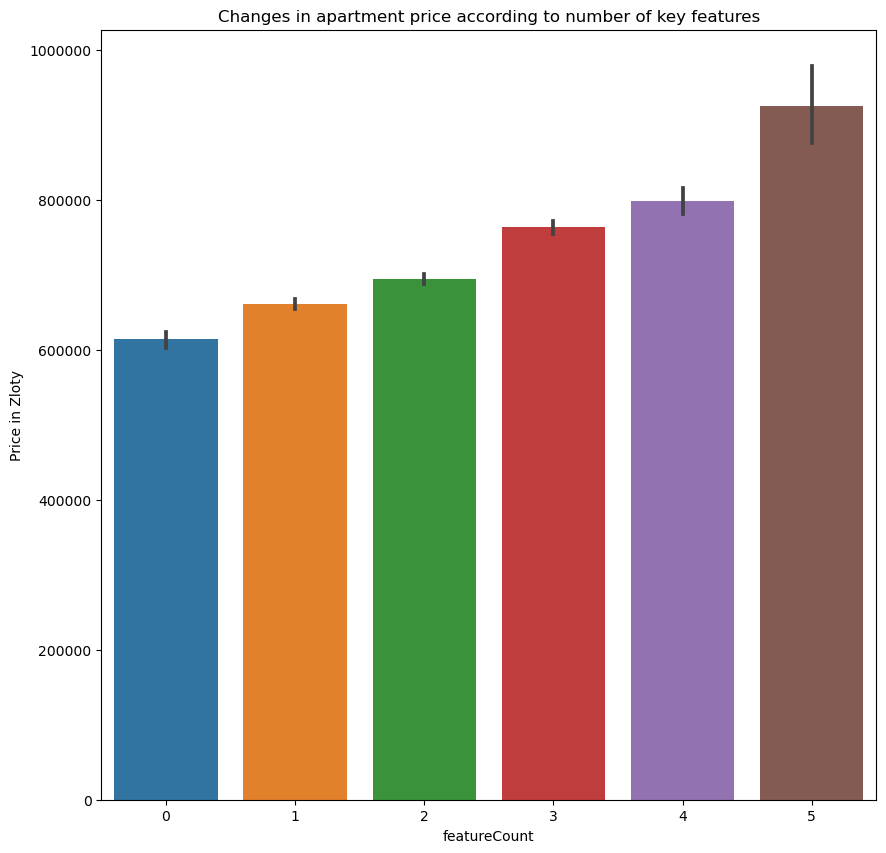

In [26]:
plt.figure(figsize=(10,10))
# Barplot of number of apartment features against the price
sns.barplot(x="featureCount", y="price", data=df)

ax = plt.gca()
ax.set_ylabel("Price in Zloty")
plt.ticklabel_format(style="plain", axis='y')

plt.title("Changes in apartment price according to number of key features")
plt.show()

From the barplot, the price gradually increases according to the number of features the apartment has. So, the correlation coefficient is expected to be positive and high. Since the distribution of price is skewed to the right, the Spearman correlation method will be used to check the correlation between apartment price and number of features.

In [27]:
# Correlation test between price and the number of features an apartment has
corr_price, pval_price = stats.spearmanr(df["price"], df["featureCount"])
print(f"Correlation coefficient between price and number of features: {corr_price:.2f}")
print(f"With p-value: {pval_price:.8f}")

Correlation coefficient between price and number of features: 0.17
With p-value: 0.00000000


The p-value of being 0 or very close to zero indicates that the relationship does exist and there's very little chance of the relationship occurring by chance. However, from the previous barplot the correlation coefficient was expected to be higher. But, the relationship turned out to be a positive but weak relationship (Correlaton coefficient of 0.17). This could indicate that there are more variables that can affect the prices.

## 6. Is there a significant difference in the prices of apartments with only one of the following features: Parking space, balcony, elevator, security or storage room?

In [28]:
# Creating 5 dataframes for each apartment with only one of the following features:
# Parking space, balcony, elevator, security or storage room
df_parking = df[(df["hasParkingSpace"] == True) & (df["featureCount"] == 1)]
df_balcony = df[(df["hasBalcony"] == True) & (df["featureCount"] == 1)]
df_elevator = df[(df["hasElevator"] == True) & (df["featureCount"] == 1)]
df_security = df[(df["hasSecurity"] == True) & (df["featureCount"] == 1)]
df_storage = df[(df["hasStorageRoom"] == True) & (df["featureCount"] == 1)]

In [38]:
df_parking['Feature'] = 'Parking'
df_balcony['Feature'] = 'Balcony'
df_elevator['Feature'] = 'Elevator'
df_security['Feature'] = 'Security'
df_storage['Feature'] = 'Storage'

anova_df = pd.concat([df_parking, df_balcony, df_elevator, df_security, df_storage])

In [40]:
# anova_df.to_csv("anova.csv")

In [33]:
df_parking_skew = df_parking["price"].skew()
df_balcony_skew = df_balcony["price"].skew()
df_elevator_skew = df_elevator["price"].skew()
df_security_skew = df_security["price"].skew()
df_storage_skew = df_storage["price"].skew()

apartment_features_skew = {
    "parking_space": df_parking_skew,
    "balcony": df_balcony_skew,
    "elevator": df_elevator_skew,
    "security": df_security_skew,
    "storage": df_storage_skew
}

for feature, skew in apartment_features_skew.items():
    print(f"{feature} has the skewness value of: {skew}")

parking_space has the skewness value of: 1.1677319371205637
balcony has the skewness value of: 1.4523780956970118
elevator has the skewness value of: 1.6014778271541166
security has the skewness value of: 1.1088716835655008
storage has the skewness value of: 1.7865759432727435


ANOVA is used to check if there's a significant difference between the 5 data groups. Preliminary assumptions for ANOVA can be met:
1. The data groups are independent of each other
2. The variance between each data group is not that far off from each other
3. While the data is generally required to be normal, the skewness of each data group is just slightly above 1


With the hypotheses:
- H0: The average apartment prices with only one of the following features: Parking space, balcony, elevator, security or storage room is the same
- H1: The average apartment prices with only one of the following features: Parking space, balcony, elevator, security or storage room is not the same

In [32]:
# ANOVA test to see if there is a significant difference in the prices of apartment with certain features
f_stat, p_val = stats.f_oneway(df_parking["price"],\
                               df_balcony["price"],\
                               df_elevator["price"],\
                               df_security["price"],\
                               df_storage["price"])
print(f"F-statistic: {f_stat:.2f}")
print(f"With p-value: {p_val:.6f}")

F-statistic: 82.10
With p-value: 0.000000


With the p-value being 0 or very close to 0, the null hypothesis is rejected and it can be concluded that the average apartment prices with only one of the following features: Parking space, balcony, elevator, security or storage room is different. Furthermore, the f-statistic value being very high at 143.12 indicates that one or more of the average apartment price with certain features is significantly different than the other.


In [34]:
# Further testing to see where the difference in average apartment prices occurs
tukey_result = stats.tukey_hsd(df_parking["price"],\
                               df_balcony["price"],\
                               df_elevator["price"],\
                               df_security["price"],\
                               df_storage["price"])
print(tukey_result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)  14341.458     0.841-23634.026 52316.941
 (0 - 2) -40106.687     0.031-77927.127 -2286.247
 (0 - 3)  88232.577     0.005 18724.806157740.348
 (0 - 4) 108817.331     0.000 72192.039145442.622
 (1 - 0) -14341.458     0.841-52316.941 23634.026
 (1 - 2) -54448.145     0.000-80038.441-28857.849
 (1 - 3)  73891.120     0.013 10205.895137576.344
 (1 - 4)  94475.873     0.000 70687.439118264.307
 (2 - 0)  40106.687     0.031  2286.247 77927.127
 (2 - 1)  54448.145     0.000 28857.849 80038.441
 (2 - 3) 128339.264     0.000 64746.371191932.158
 (2 - 4) 148924.018     0.000125383.884172464.151
 (3 - 0) -88232.577     0.005-157740.348-18724.806
 (3 - 1) -73891.120     0.013-137576.344-10205.895
 (3 - 2) -128339.264     0.000-191932.158-64746.371
 (3 - 4)  20584.753     0.900-42304.693 83474.199
 (4 - 0) -108817.331     0.000-145442.622-72192.039
 (4 - 1) -94475.873     0.

Further testing is done using the Tukey's HSD test to see which pair causes the statistically significant difference in average apartment prices. The pairs that **did not** show a statistically significant difference in prices are:
1. Apartments with either a parking space or a balcony
2. Apartments with either a parking space or an elevator
3. Apartments with either a security feature or a storage room

The price difference greatly occurs on:
1. Apartments with a parking space vs a storage room
2. Apartments with an elevator vs a security feature
3. Apartments with an elevator vs a storage room

In [ ]:
# df.to_csv("apartments_pl_202308-10.csv", index=False)

---

# Conclusion

Based on the analyses done, a few points can be noted on the recent development or changes in apartment prices in the 15 largest cities in Poland:
1. The most common apartment type is a block of flats
2. The average price of an apartment with a single room is around 600 thousand zloty and for every additional room, expect the price to rise by 200 thousand zloty until 4 rooms
3. There is a weak positive relationship between apartment pricing and the amount of nearby points of interest
4. There is a weak positive relationship between apartment pricing and the amount of key features the apartment has
5. There is a significant difference in the average apartment prices with only one of the following features: Parking space, balcony, elevator, security or storage room.

With these key points, a few things can be suggested when deciding on choosing an apartment in Poland:
1. The amount of nearby points of interest and key features the apartment has only lightly influence the price of apartments
2. - A dedicated parking space influences the price greatly compared to having a storage room
   - An elevator in the apartment building influences the price more than a security feature or a storage room

---

Relevant links
1. <a href="kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data">Dataset source</a>
2. <a href="https://public.tableau.com/views/Milestone1_fernaldy/Chartdashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link">Dashboard for the chart analysis</a>
3. <a href="https://public.tableau.com/views/Milestone1_statschart_fernaldy/Statsdashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link">Dashboard for the statistic charts analyses</a>